# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
# X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
X, Y = fetch_openml(name='mnist_784', version=1, return_X_y=True, cache=False, as_frame=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

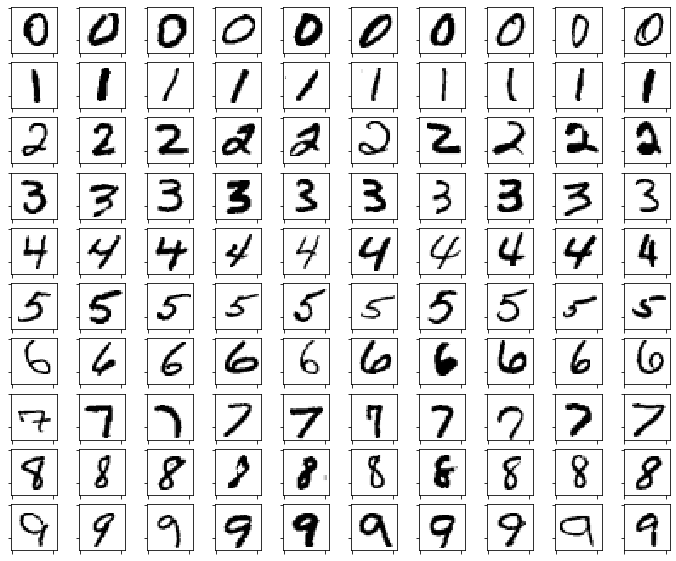

In [4]:
#def P1(num_examples=10):

### STUDENT START ###
# plt.rc('lines', linewidth = 4)

#Set Figure Size
part_1_figure = plt.figure(figsize=(12, 10))


#create a dictionary counter for each int to make sure it prints 10 times
row_contin_dict = {}
for i in range(10):
    row_contin_dict[i] = 0

#create temp tables that will be edited in the foor loop
mini_train_labels_tmp = mini_train_labels
mini_train_data_tmp = mini_train_data

#create a total counter to break the for loop when all the slots have been filled (i.e. the 10 x 10 is complete)
total = 0
for lab in mini_train_labels_tmp:
    i = int(lab)
    if row_contin_dict[i] <= 9:
        ax = plt.subplot2grid((10,10), (i,row_contin_dict[i]))
        digits = np.reshape(mini_train_data_tmp[0], (28, 28))
        ax.imshow(digits, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        row_contin_dict[i] += 1
        total += 1
        #QC print statement
        #print("total:", total, "value:", mini_train_labels_tmp[0], "(i,j)", (i,row_contin_dict[i]))
        mini_train_labels_tmp = mini_train_labels_tmp[1:]
        mini_train_data_tmp = mini_train_data_tmp[1:]
    
    #if all the grid int spots have been populated, break the loop
    elif total > 99:
        break
    
    #else if remove the fully populated int from the temp data and labels
    else:
        #QC print statement
        #print(i)
        mini_train_labels_tmp = mini_train_labels_tmp[1:]
        mini_train_data_tmp = mini_train_data_tmp[1:]
        pass

plt.show()
part_1_figure.tight_layout()


### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
#def P2(k_values):

### STUDENT START ###

for k in [1,3,5,7,9]:
    y_true = []
    y_pred = []
    #create a k nearest neighbor object for each k size
    neigh = KNeighborsClassifier(n_neighbors=k)
    #fit the model
    neigh.fit(mini_train_data, mini_train_labels)
    correct = 0
    #loop through the development labels and compare them to the predicted digit
    for i in range(len(dev_labels)):
        # if the prediction matches the label, increase the correct counter by one
        if int(neigh.predict([dev_data[i]])[0]) == int(dev_labels[i]): 
            correct += 1
        y_true.append(int(dev_labels[i]))
        y_pred.append(int(neigh.predict([dev_data[i]])[0]))
    #print the ratio of correct matches to the total size of the label array
    print("k:" + str(k) + " - " + str(correct/int(len(dev_labels))*100)+"% accurate")
    if k == 1: print(classification_report(y_true, y_pred, digits=3))     

        
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

k:1 - 88.4% accurate
              precision    recall  f1-score   support

           0      0.953     0.953     0.953       106
           1      0.885     0.983     0.932       118
           2      0.903     0.792     0.844       106
           3      0.933     0.866     0.898        97
           4      0.907     0.848     0.876        92
           5      0.856     0.875     0.865        88
           6      0.922     0.922     0.922       102
           7      0.850     0.941     0.893       102
           8      0.828     0.766     0.796        94
           9      0.804     0.863     0.832        95

    accuracy                          0.884      1000
   macro avg      0.884     0.881     0.881      1000
weighted avg      0.885     0.884     0.883      1000

k:3 - 87.6% accurate
k:5 - 88.2% accurate
k:7 - 87.7% accurate
k:9 - 87.5% accurate


ANSWER:
The k-Nearest neighbor has the most trouble correctly classifing '9'

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]

#create empty arrays to append results to after each loop. Used in later questions.
accuracies = [] #the accuracy of each loop
times = [] #the time to train the model and evaluate the accuracy of each loop.

# loop through the different training sizes
for j in train_sizes:
    # strat the timer and fit the model based on the training sizes
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors=1)
    #slice the training data
    neigh.fit(train_data[0:j], train_labels[0:j])
    #determine the accuracy
    counter = 0
    for i in range(len(dev_labels)):
        y_true = int(dev_labels[i])
        y_pred = int(neigh.predict([dev_data[i]])[0])
        if y_true == y_pred: counter += 1
    #end the timer and append to the lists
    end_time = time.time()
    time_tmp = round(end_time - start_time,4)
    accuracy = round(counter/len(dev_labels)*100,1)
    times.append(time_tmp)
    accuracies.append(accuracy)
    
    print(j, " Samples, time: ", time_tmp, 
          "s, accuracy: ", accuracy, "%", 
          sep = "")

    
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

100 Samples, time: 0.6104s, accuracy: 70.2%
200 Samples, time: 0.7354s, accuracy: 79.1%
400 Samples, time: 1.0285s, accuracy: 81.1%
800 Samples, time: 1.7261s, accuracy: 86.6%
1600 Samples, time: 2.8891s, accuracy: 90.5%
3200 Samples, time: 4.9797s, accuracy: 92.7%
6400 Samples, time: 9.1648s, accuracy: 93.9%
12800 Samples, time: 17.6146s, accuracy: 95.2%
25600 Samples, time: 35.786s, accuracy: 96.3%


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

No transformation - prediction vs actual
R-squared: 0.417700663416102
Slope Coeff and Y intercept:
0.0006687581380828011
83.4918287937743


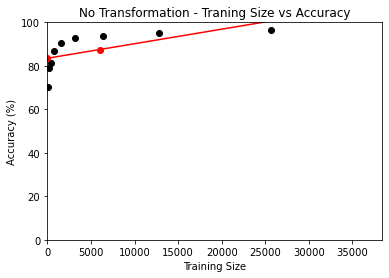

Log transformation - prediction vs actual
Slope Coeff and Y intercept:
R-squared: 0.9068304252436645
4.43388275899875
54.57677086564788


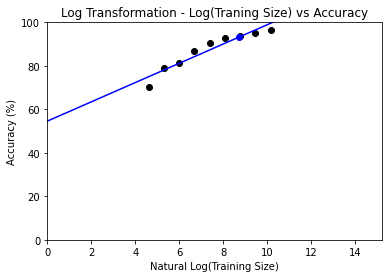

In [7]:
#def P4():

### STUDENT START ###

#No Transformation
print("No transformation - prediction vs actual")
# create a training size array and use the accuracies from part 3 to create the linear fit
X = []
[X.append([i]) for i in train_sizes]
y = accuracies

#Produce linear regression model
reg = LinearRegression().fit(X, y)
#print the R-squared value for the linear regression
print("R-squared:", reg.score(X, y))
#print the slope coefficient and y intercept
print("Slope Coeff and Y intercept:")
print(reg.coef_[0])
print(reg.intercept_)
X_pred = [[0], [6000], [120000], [1000000]]
#predict the y values based on X_pred
y_pred = reg.predict(np.array(X_pred))
# print(y_pred)

#create a scatter plot and regression plot
plt.scatter(X, y, color='black')
plt.scatter(X_pred, y_pred, color='red')
plt.plot(X_pred, y_pred, color='red')
plt.xlim([0, 25600 * 1.5])
plt.ylim([0,100])
plt.title("No Transformation - Traning Size vs Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy (%)")
plt.show()


#Log Transformation on the X-Axis
print("Log transformation - prediction vs actual")
X_log = []
[X_log.append([np.log(i)]) for i in train_sizes]

reg_log = LinearRegression().fit(X_log, y)
print("Slope Coeff and Y intercept:")
print("R-squared:", reg_log.score(X_log, y))
print(reg_log.coef_[0])
print(reg_log.intercept_)
#add a small delta to X_pred = 0 so the log transformation doesn't cause an error
X_log_pred = [[np.log(0.00001)], [np.log(6000)], [np.log(120000)], [np.log(1000000)]]
y_log_pred = reg_log.predict(np.array(X_log_pred))
# print(y_log_pred)

plt.scatter(X_log, y, color='black')
plt.scatter(X_log_pred, y_log_pred, color='blue')
plt.plot(X_log_pred, y_log_pred, color='blue')
plt.xlim([0, np.log(25600)*1.5])
plt.ylim([0,100])
plt.title("Log Transformation - Log(Traning Size) vs Accuracy")
plt.xlabel("Natural Log(Training Size)")
plt.ylabel("Accuracy (%)")
plt.show()


### STUDENT END ###

#P4()

ANSWER: The linear regression for the non-transformation model has a poor linear fit and lower predictive/explanatory power indicating a that if a releationship exists between the non-linear relationship between training size and the fit of the linear regression. The log transformation of the training data size confirms an exponential relation with the model fit. 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


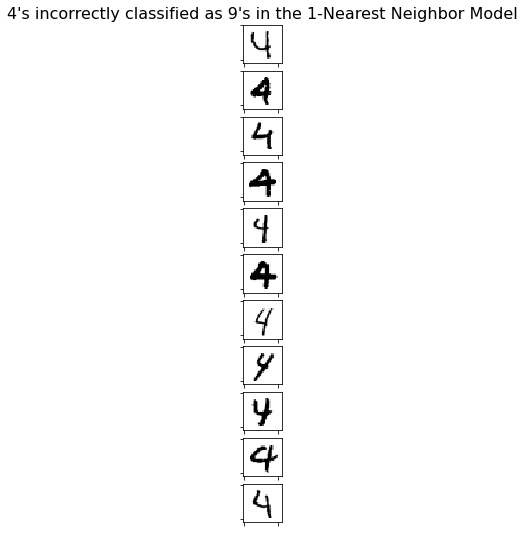

<Figure size 432x288 with 0 Axes>

In [8]:
#def P5():

### STUDENT START ###
# train a k=1 nearest neighbor model on the mini train data
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(mini_train_data, mini_train_labels)

#create empty lists for the loop to append to
y_true = []
y_pred = []

#append labels and predicted digits
for i in range(len(dev_labels)):
    y_true.append(int(dev_labels[i]))
    y_pred.append(int(neigh.predict([dev_data[i]])[0]))

#create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
# The model often confuses the predicted 9 with the actual value 4

#Filter the dev data set to the 4's and 9's 
cm_df = np.append(np.transpose(np.array([y_pred, y_true], dtype=np.int8)), dev_data, axis = 1)
cm_df = cm_df[cm_df[:,0] == 9] # filter the true values
cm_df = cm_df[cm_df[:,1] == 4][:,2:] # filter the true values

#plot the values
plt.figure(figsize=(12, 10))
print(cm_df)
#Creat Plots of incorrect 9's
row_i = 1
# for index, row in cm_df.iterrows():
for index in range(len(cm_df)):
    row = cm_df[index]
    #create grid for subplots and plot each image
    ax = plt.subplot2grid((len(cm_df) + 1, 2), (row_i, 1))
    digits = np.reshape(row, (28, 28))
    ax.imshow(digits, cmap=plt.cm.gray_r, interpolation='nearest')

    #remove pixel tick marks
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    #add a title
    if row_i == 1:
        plt.title("4's incorrectly classified as 9's in the 1-Nearest Neighbor Model", size = 16)
    #increase row counter
    row_i += 1

plt.show()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### STUDENT END ###

# P5()

ANSWER: The model most often incorrectly classifies a 4-digit as a 9-label. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

weight = 0.1


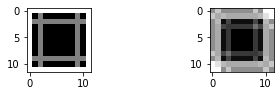

weight = 300


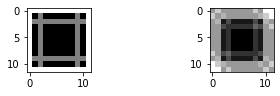

In [9]:
# 6 proof of concept before adding the training data. The graphic illustrate what is going on in the smoothing function. 
# This smoothing is then used to answer part 6.

#create an square grid with 144 pixels as an illustrative example
size = 12

# create a zero square data frame and one square data frame of size X size.
x = np.ones((size,size))
x_tmp = np.zeros((size, size))

#loop through the x and y values. create random pixel values in the square matrix
for i in range(size):
    for j in range(size):
        if i == 0 or j == 0 or i == size - 1 or j == size - 1:
#             x.iloc[i,j] = 0
            x[i,j] = 0
        elif i == 2 or j == 2 or i == size - 3 or j == size - 3:
#             x.iloc[i,j] = 0.5
            x[i,j] = 0.5          
            
            
#loop through two weight sizes
for k in [0.1, 300]:
    weight = k           

    #shift the matrix by one in all directions and add the pixel values. weight the pixel values from the shifted cells.
    for i in range(-1,2):
                for j in range(-1,2):
                    if i != 0 and j != 0:
                        if i < 0:
                            x_shift = np.pad(x,((0,0),(abs(i),0)), mode='constant')[:, :-1]
                            x_shift = np.pad(x_shift,((abs(i),0),(0,0)), mode='constant')[:-1, :]                            
#                         x_shift = np.roll(np.roll(x_shift,i,axis=0),i,axis=1)
                        else:
                            x_shift = np.pad(x,((0,0),(0,i)), mode='constant')[:, 1:]
                            x_shift = np.pad(x_shift,((0,i),(0,0)), mode='constant')[1:, :]
                        x_tmp += x_shift/weight
                    else:
                        x_shift = x # no shift when i & j = 0
                        x_tmp += x_shift           

    #renormalize the values so the pixel sums is the same on the pre and post matrixes
    x_sum = np.sum(np.sum(x))
    x_tmp_sum = np.sum(np.sum(x_tmp))
    
    
    x_tmp_2 = x_tmp*x_sum/x_tmp_sum
    x_tmp_2_sum = np.sum(np.sum(x_tmp_2))

    #plot the smoothed grids. The figures show the pre and post smoothing graphics.
    if weight == 0.1:
        print("weight =", weight)
        ax1 = plt.subplot2grid((3, 2), (1, 0))
        ax1.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')


        ax1 = plt.subplot2grid((3, 2), (1, 1))
        ax1.imshow(x_tmp_2, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
    else:
        print("weight =", weight)
        ax1 = plt.subplot2grid((3, 2), (2, 0))
        ax1.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')


        ax1 = plt.subplot2grid((3, 2), (2, 1))
        ax1.imshow(x_tmp_2, cmap=plt.cm.gray_r, interpolation='nearest')


In [11]:
#def P6():
    
### STUDENT START ###

def smooth(weight = 1, data = mini_train_data):
    #time the smoothing function
    start_time = time.time()
    data_smoothed_df = data.copy()
    
#     for index, row in pd.DataFrame(data).iterrows():
    for index in range(len(data)):
        row = data[index]
        #create two 28 x 28 tables. one with the reshaped observation digits (pre-smoothing) and a blank df for smoothing values
        digits = np.reshape(row, (28, 28))
        df_tmp = np.zeros((28, 28))
        #sum the shifted values.
        for i in range(-1,2):
                for j in range(-1,2):
                    if i != 0 and j != 0:
#                         digits_shift = np.roll(np.roll(digits.copy(),i,axis=0),i,axis=1)
                        if i < 0:
                            digits_shift = np.pad(digits.copy(),((0,0),(abs(i),0)), mode='constant')[:, :-1]
                            digits_shift = np.pad(digits_shift,((abs(i),0),(0,0)), mode='constant')[:-1, :]                            
                        else:
                            x_shift = np.pad(digits.copy(),((0,0),(0,i)), mode='constant')[:, 1:]
                            x_shift = np.pad(digits_shift,((0,i),(0,0)), mode='constant')[1:, :]
                        df_tmp += digits_shift/weight #apply weight to shifted values and add shifted valued to the new pixels total
                    else:
                        digits_shift = digits.copy() # no shift when i & j = 0
                        df_tmp += digits_shift        

        # normalize the weighted digits back to 0 to 1 scale
        sum_pre = np.sum(np.sum(digits))
        sum_post = np.sum(np.sum(df_tmp))
        df_tmp = sum_pre/sum_post * df_tmp

        data_smoothed_df[index] = df_tmp.flatten()
    #end the timer.
    end_time = time.time()
    time_tmp = round(end_time - start_time,4)
    print(time_tmp, "seconds to smooth the data")
    
    #handle different data type inputs
    try:
        return data_smoothed_df.to_numpy()
    except:
        return data_smoothed_df

#create an accuracy function that counts the correctly predicted values
def accuracy_p6(data, labels, neigh_tmp, weight_input = 1):
    y_true = []
    y_pred = []
    correct = 0
    for i in range(len(labels)):
        if int(neigh_tmp.predict([data[i]])[0]) == int(labels[i]): 
            correct += 1
        y_true.append(int(labels[i]))
        y_pred.append(int(neigh_tmp.predict([data[i]])[0]))
    print("smoothing weight: ", weight_input, "; ", str(correct/int(len(labels))*100)+"% accurate", sep = "")
    

for master_weight in [0.01, 1, 1000]:
    print("---------------------")
    print("Smooth weight =", master_weight)
    
    # Scenario 1: Do not use the filter
    print("\nDo not use the filter")
    neigh_1 = KNeighborsClassifier(n_neighbors=1)
    neigh_1.fit(mini_train_data, mini_train_labels)
    accuracy_p6(data = dev_data, labels = dev_labels, weight_input = "no smoothing", neigh_tmp = neigh_1)

    # Scenario 2: Filter the training data but not the dev data
    print("\nFilter the training data but not the dev data")
    mini_train_data_smoothed = smooth(weight = master_weight, data = mini_train_data)
    neigh_2 = KNeighborsClassifier(n_neighbors=1)
    neigh_2.fit(mini_train_data_smoothed, mini_train_labels)
    accuracy_p6(data = dev_data, labels = dev_labels, weight_input = master_weight, neigh_tmp = neigh_2)

    # Scenario 3: Filter the dev data but not the training data
    print("\nFilter the dev data but not the training data")
    dev_data_smoothed = smooth(weight = master_weight, data = dev_data)
    neigh_3 = KNeighborsClassifier(n_neighbors=1)
    neigh_3.fit(mini_train_data, mini_train_labels)
    accuracy_p6(data = dev_data_smoothed, labels = dev_labels, weight_input = master_weight, neigh_tmp = neigh_3)

    # Scenario 4: Filter both training data and dev data
    print("\nFilter both training data and dev data\n")
    # mini_train_data_smoothed = smooth(weight = master_weight, data = mini_train_data)
    # dev_data_smoothed = smooth(weight = master_weight, data = dev_data)
    neigh_4 = KNeighborsClassifier(n_neighbors=1)
    neigh_4.fit(mini_train_data_smoothed, mini_train_labels)
    accuracy_p6(data = dev_data_smoothed, labels = dev_labels, weight_input = master_weight, neigh_tmp = neigh_4)


### STUDENT END ###

#P6()

---------------------
Smooth weight = 0.01

Do not use the filter
smoothing weight: no smoothing; 88.4% accurate

Filter the training data but not the dev data
0.3735 seconds to smooth the data
smoothing weight: 0.01; 87.7% accurate

Filter the dev data but not the training data
0.3707 seconds to smooth the data
smoothing weight: 0.01; 82.69999999999999% accurate

Filter both training data and dev data

smoothing weight: 0.01; 88.7% accurate
---------------------
Smooth weight = 1

Do not use the filter
smoothing weight: no smoothing; 88.4% accurate

Filter the training data but not the dev data
0.3736 seconds to smooth the data
smoothing weight: 1; 88.9% accurate

Filter the dev data but not the training data
0.3778 seconds to smooth the data
smoothing weight: 1; 86.6% accurate

Filter both training data and dev data

smoothing weight: 1; 89.1% accurate
---------------------
Smooth weight = 1000

Do not use the filter
smoothing weight: no smoothing; 88.4% accurate

Filter the training

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

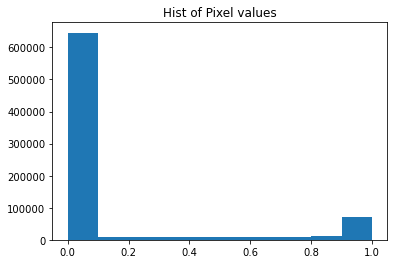

Bernoulli_NB: 81.4% accurate
Multinomial_NB with 0.1 and 0.9 cutoffs: 80.7% accurate
Multinomial_NB with 0.3 and 0.7 cuttoffs (QC purposes only): 81.8% accurate


In [12]:
#def P7():

#define an accuracy printing function
def accuracy_p7(data, labels, NB_tmp):
    correct = 0
    for i in range(len(labels)):
        if int(NB_tmp.predict([data[i]])[0]) == int(labels[i]): 
            correct += 1
    print(NB_tmp.__name__,": {0:.1f}% accurate".format(correct/int(len(labels))*100), 
         sep = "")

plt.hist(mini_train_data.flatten())
plt.title("Hist of Pixel values")
plt.show()

#Part 1. Fit the Bernoulli Naive Bayes
#fit the model and produce the accuracy print out            
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(mini_train_data, mini_train_labels)
BernNB.__name__ = "Bernoulli_NB"
mini_train_pred = BernNB.predict(dev_data)
accuracy_p7(dev_data, dev_labels, BernNB)

#Part 2. Fit the Multinomial Naive Bayes
#loop through the data to assign values of 0, 1, or 2
mini_train_data_edited = mini_train_data.copy()
for row_i in range(mini_train_data_edited.shape[0]):
    for col_j in range(mini_train_data_edited.shape[1]):
        if mini_train_data_edited[row_i, col_j] < 0.1:
            mini_train_data_edited[row_i, col_j] = 0
        elif mini_train_data_edited[row_i, col_j] < 0.9:
            mini_train_data_edited[row_i, col_j] = 1
        else:
            mini_train_data_edited[row_i, col_j] = 2

#fit the model and produce the accuracy print out            
MultiNB = MultinomialNB()
MultiNB.fit(mini_train_data_edited, mini_train_labels)
MultiNB.__name__ = "Multinomial_NB with 0.1 and 0.9 cutoffs"
accuracy_p7(dev_data, dev_labels, MultiNB)

#Part 3. Fit the Multinomial Naive Bayes with different cuttoffs (QC purposes only)
#loop through the data to assign values of 0, 1, or 2
mini_train_data_edited = mini_train_data.copy()
for row_i in range(mini_train_data_edited.shape[0]):
    for col_j in range(mini_train_data_edited.shape[1]):
        if mini_train_data_edited[row_i, col_j] < 0.3:
            mini_train_data_edited[row_i, col_j] = 0
        elif mini_train_data_edited[row_i, col_j] < 0.7:
            mini_train_data_edited[row_i, col_j] = 1
        else:
            mini_train_data_edited[row_i, col_j] = 2

#fit the model and produce the accuracy print out            
MultiNB = MultinomialNB()
MultiNB.fit(mini_train_data_edited, mini_train_labels)
MultiNB.__name__ = "Multinomial_NB with 0.3 and 0.7 cuttoffs (QC purposes only)"
accuracy_p7(dev_data, dev_labels, MultiNB)

### STUDENT END ###

#P7()

ANSWER:
No the multinomial model did not improve the accuracy of the model because the added categorical value (i.e. 0, 1, 2 vs 1, 2) created more miss classification opportunities for the model as the addition of the 0.9 cutoff bisectted digit values where there were a relatively high number of pixel counts (see the hist of pixel values across the dev data set). In the QC section, I adjusted the categorical cuttoffs the shift away from the boundary where there were lot's of digits (i.e. 0.1 and 0.9) and this improved the model accuracy. 

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [13]:
#def P8(alphas):

### STUDENT START ###

# Evaluate accuracy by varing alpha with dev set
#create an accuracy printing funcion
def accuracy_p8(data, labels, alpha, NB_tmp):
    y_true = []
    y_pred = []
    correct = 0
    for i in range(len(labels)):
        if int(NB_tmp.predict([data[i]])[0]) == int(labels[i]): 
            correct += 1
        y_true.append(int(labels[i]))
        y_pred.append(int(NB_tmp.predict([data[i]])[0]))
    print("LaPlace smoothing parameter = {0:.4f};".format(alpha),
          " NB model = {0:.3f}% accurate".format(correct/int(len(labels))*100), 
         sep = "")

#loop through different laplace smoothing parameters, fit a Bernoulli model, and evaluate its accuracy     
for alpha_input in [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    BernNB = BernoulliNB(binarize=0, alpha = alpha_input)
    BernNB.fit(mini_train_data, mini_train_labels)
    mini_train_pred = BernNB.predict(dev_data)
    accuracy_p8(dev_data, dev_labels, alpha_input, BernNB)


# Evaluate the performance by varying alpha with cross validation
BernNB = BernoulliNB(binarize=0)
#create a dictionary to store the Criss Validation results for each alpha value
parameters = {'alpha':[1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
CV = GridSearchCV(BernNB, parameters, cv= None, scoring='accuracy', iid=False)
CV.fit(mini_train_data, mini_train_labels)
#convert the dictionary to a data frame
# CV_results_df = pd.DataFrame.from_dict(CV.cv_results_).sort_values(by='rank_test_score', ascending=True)
# print(CV_results_df)
# dict = {"a": 1, "b": 2, "c": 3, "d": 4}
data = list(CV.cv_results_.items())
CV_results_df = np.array(data)
print(CV_results_df)

#create column headers to sort by
# cols_to_order = ['param_alpha', 'mean_test_score', 'std_test_score',
#                                'split0_test_score',
#                                'split1_test_score',
#                                'split2_test_score',
#                                'split3_test_score',
#                                'split4_test_score']
#rearange the CV data frame
# CV_results_df = CV_results_df[cols_to_order + 
#                               (CV_results_df.columns.drop(cols_to_order).tolist())]
# CV_results_df
### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

LaPlace smoothing parameter = 0.0000; NB model = 81.600% accurate
LaPlace smoothing parameter = 0.0001; NB model = 82.300% accurate
LaPlace smoothing parameter = 0.0010; NB model = 82.300% accurate
LaPlace smoothing parameter = 0.0100; NB model = 82.400% accurate
LaPlace smoothing parameter = 0.1000; NB model = 82.200% accurate
LaPlace smoothing parameter = 0.5000; NB model = 81.600% accurate
LaPlace smoothing parameter = 1.0000; NB model = 80.900% accurate
LaPlace smoothing parameter = 2.0000; NB model = 81.100% accurate
LaPlace smoothing parameter = 10.0000; NB model = 77.900% accurate
[['mean_fit_time'
  array([0.00818777, 0.00633082, 0.00649056, 0.00629344, 0.00667553,
       0.00668449, 0.00683141, 0.00718474, 0.00753255])]
 ['std_fit_time'
  array([0.00083226, 0.00055942, 0.00025688, 0.00023221, 0.00024682,
       0.00048773, 0.00051442, 0.00053699, 0.00056377])]
 ['mean_score_time'
  array([0.00190716, 0.00160851, 0.00134759, 0.00133858, 0.0014039 ,
       0.00166683, 0.0015789 

/Users/ls_enel/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
<ipython-input-13-e2c347b3305b>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  CV_results_df = np.array(data)


ANSWER:

The model performance best when alpha is between 0.01 and 0.0001 (i.e. around 0.001) at 82.4%. When alpha is approximately 0, the mean_test_score is 0.814 and the model accuracy is about 81.6%. I'm surprised to see that it is this high and to learn that as the smoothing parameter increases, the model accuracy goes down.



### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [14]:
#def P9():

### STUDENT START ###
# test_data, test_labels 
# dev_data, dev_labels
# train_data, train_labels
# mini_train_data, mini_train_labels

#define an accuracy print statement
def accuracy_p9(data, labels, smoothing, GNB_tmp):
    correct = 0
    for i in range(len(labels)):
        if int(GNB_tmp.predict([data[i]])[0]) == int(labels[i]): 
            correct += 1
    print("Smoothing parameter = {0:.4f};".format(smoothing),
          " NB model = {0:.3f}% accurate".format(correct/int(len(labels))*100), 
         sep = "")

#loop through a range of smoothing parameters to minimize the impact of relatively large variances from the mean on the prediction.
for var_smoothing_i in [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    #var_smoothing is the portion of the largest variance of all features that is added to variances for calculation stability.
    GNB = GaussianNB(priors = None, var_smoothing = var_smoothing_i)
    GNB.fit(mini_train_data, mini_train_labels)
    accuracy_p9(dev_data, dev_labels, var_smoothing_i, GNB)


### STUDENT END ###

#P9()

Smoothing parameter = 0.0000; NB model = 58.200% accurate
Smoothing parameter = 0.0001; NB model = 72.100% accurate
Smoothing parameter = 0.0010; NB model = 75.800% accurate
Smoothing parameter = 0.0100; NB model = 79.700% accurate
Smoothing parameter = 0.1000; NB model = 81.700% accurate
Smoothing parameter = 0.5000; NB model = 76.400% accurate
Smoothing parameter = 1.0000; NB model = 73.700% accurate
Smoothing parameter = 2.0000; NB model = 70.600% accurate
Smoothing parameter = 10.0000; NB model = 67.000% accurate


ANSWER: With a smoothing parameter of 0.1, the Gaussian Niave Bayes model accuracy increases from 58.2% to 81.7%. The GaussianNB var_smoothing parameter helps to smooth the impact on relatively large variances from the mean for the pixel values, thus helping to stabalize the model in instances of high variance of digit pixel values.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

Estimate Probablity for the digits with random pixels removed.


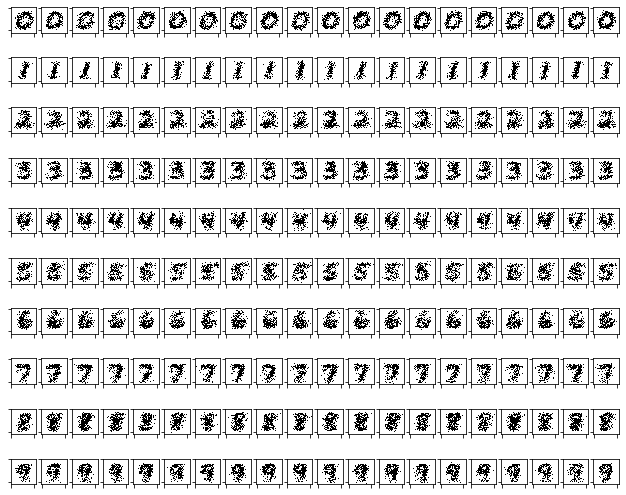

Actual pixels for the digits from part 1.


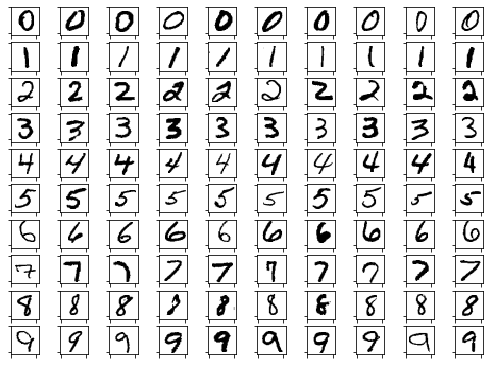

<Figure size 432x288 with 0 Axes>

In [16]:
#def P10(num_examples):

### STUDENT START ###
%matplotlib inline

#NOTE THIS CELL MAY TAKE UP TO 30 seconds to run!

#create a Bernouilli model and fit the training data
BernNB = BernoulliNB(binarize=0, alpha = 0.0001)
BernNB.fit(train_data, train_labels)

#plot the values
plt.figure(figsize=(12, 10))

#create 20 images for each digit
for i in range(20):
    #create a random df that is size 10 x 784
    random_values = np.random.rand(10, 784)
    #create a zero df that is size 10 x 784
    combo = np.zeros((10,784))
    #produce the probabilties of each digit
    bern_prob = np.exp(BernNB.feature_log_prob_)
    
    #loop through the rows and columns of the zero data frame and replace zeros with a 1 value if the 
    # random value is less than the predicted probablity. This will randomly add pixels to introduce some 
    # variation in the 20 images for each of the 10 digits.
    for row in range(combo.shape[0]):
        for col in range(combo.shape[1]):
            # if the random value 
            if random_values[row,col] - bern_prob[row,col] < 0: combo[row,col] = 1
    
    #loop through 1s and 0s data frame corresponding with each digit and plot it
    row_i = 1
    for index in range(len(combo)):
        row = combo[index]
        #create grid for subplots and plot each image
        ax = plt.subplot2grid((10 + 1, 2 + 20), (row_i, i))
        digits = np.reshape(row, (28, 28))
        ax.imshow(digits, cmap=plt.cm.gray_r, interpolation='nearest')

        #remove pixel tick marks
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        #increase row counter
        row_i += 1

print("Estimate Probablity for the digits with random pixels removed.")
plt.show()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

print("Actual pixels for the digits from part 1.")
part_1_figure.set_size_inches(7, 5, forward=True)
part_1_figure
# plt.show()
# plt.tight_layout()



### STUDENT END ###

#P10(20)

ANSWER:

The numbers with minimal black pixels and open white space between the black pixels (e.g. 0, 1, and 7) look fairly recognizable when compared to the training data but the other numbers that require more/tighter black pixels are harder to recognize (e.g. 8, 9, 6).

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

### Notes from Asynch on Posterior Probablities
P(X|E) = P(X)P(E|X) /P(E)
- Prior: P(X)
- Posterior: P(X|E)
- Likelihood: P(E|X)
- Normalizer: P(E)

Confidence of a classifier is the posterior of the top label:
max𝑦P(𝑦∣∣𝑥)

If higher confidence values correspond with higher accuracy, the classifier is said to be calibrated.
Linear depedence of Accuracy with posterior probability -> calibrated. Play with the threshold tuning precision



In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

#set the pandas dataframe output size
# pd.set_option('display.max_columns', 20)

#define an accuracy print function
def accuracy_p11(data, labels, bin_limit):
    correct = 0
    for i in range(len(labels)):
        if int(data[i]) == int(labels[i]): 
            correct += 1
    print("Bin Limit = {0:.13f};".format(bin_limit),
          " Model Accuracy = {0:.3f}% accurate".format(correct/int(len(labels))*100), 
         sep = "")

#create a bernoulli model
BernNB = BernoulliNB(alpha = 0.001, binarize = 0.0)
BernNB.fit(mini_train_data, mini_train_labels)

#create bins where the posterior probability needs to be higher than in order to classify a digit.
# Otherwise leave it as -1 (i.e. a non-classified digit) 
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
for bin_i in buckets:    
    predicted_probability = BernNB.predict_proba(dev_data)
    #create a 1000 x 1 zero array
    predicted_probability_class = np.zeros((1000,1))

    #fill in the zero array rows with the highest probability class if it is greater than the bin cuttoff
    for index in range(len(predicted_probability)):
        rows = predicted_probability[index]
        row_max = 0
        row_predict = -1
        for col in range(len(rows)):
            if rows[col] > row_max and rows[col] >= bin_i: 
                row_max = rows[col]
                row_predict = col 
        predicted_probability_class[index] = row_predict    

    #print the accuracy of the BernBM model for each bin cuttoff size
    accuracy_p11(np.array(predicted_probability_class), dev_labels, bin_i)        
    
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))



Bin Limit = 0.5000000000000; Model Accuracy = 82.300% accurate
Bin Limit = 0.9000000000000; Model Accuracy = 81.200% accurate
Bin Limit = 0.9990000000000; Model Accuracy = 78.300% accurate
Bin Limit = 0.9999900000000; Model Accuracy = 75.600% accurate
Bin Limit = 0.9999999000000; Model Accuracy = 72.600% accurate
Bin Limit = 0.9999999990000; Model Accuracy = 67.800% accurate
Bin Limit = 0.9999999999900; Model Accuracy = 65.200% accurate
Bin Limit = 0.9999999999999; Model Accuracy = 61.800% accurate
Bin Limit = 1.0000000000000; Model Accuracy = 60.200% accurate


ANSWER: given their appears to be some linear dependence between the bin limit of the posterior probablity and the model accuracy, I would characterize the calibration for this Bernoulli Naive Bayes model as weakly callibrated.  

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [414]:
#def P12():

### STUDENT START ###

#WARNING THIS CELL CAN TAKE SEVERAL MINUTES TO RUN!
#permission on slack given to import libraries for part 12.
#importing pandas for easier syntax.
import pandas as pd

#Loop through different binarize values for Bern NB models to determine how successful each added feature was at improving the model acccuracy
for binarize_i in [0, 0.1, 0.3, 0.5, 0.7, 0.9]:
    print("-----Binarize input =", binarize_i, "---------")
    
    #define accuracy print function
    def accuracy_p12(data, labels, NB_tmp, added_feature):
        correct = 0
        for i in range(len(labels)):
            if int(NB_tmp.predict([data[i]])[0]) == int(labels[i]): 
                correct += 1
        print("Added Feature: {};".format(added_feature),
              " NB model = {0:.4f}% accurate".format(correct/int(len(labels))*100), 
             sep = "")    

    # Method 1. Row sums
    def row_sum(data = mini_train_data):
        data_row_sum_df = []

        #loop over the rows and columns of the input data
        for index, pixel_array in pd.DataFrame(data).iterrows():
            #reshape it to a 28 x 28
            digits = pd.DataFrame(np.reshape(pixel_array.to_numpy(), (28, 28)))
            #sum the rows
            row_sum = digits.sum(axis=1)
            #append the row sum to the original data frame
            data_row_sum_df.append(row_sum.to_numpy().flatten())
        
        #return the new array with row sums
        data_row_sum_df = np.array(data_row_sum_df)
        return np.append(data, data_row_sum_df, axis=1)

    #add row sums to the mini_train and dev_data
    mini_train_data_with_rowsum = row_sum(mini_train_data)
    dev_data_with_rowsum = row_sum(dev_data)

    #train the base case BernoulliNB with the optimal alpha from an early question
    BernNB = BernoulliNB(alpha = 0.001, binarize = binarize_i)
    BernNB.fit(mini_train_data, mini_train_labels)
    #print the base case accuracy
    accuracy_p12(dev_data, dev_labels, BernNB, "none")

    #train the row sum BernNB and print the accuracy
    BernNB_rowsum = BernoulliNB(alpha = 0.001, binarize = binarize_i)
    BernNB_rowsum.fit(mini_train_data_with_rowsum, mini_train_labels)
    accuracy_p12(dev_data_with_rowsum, dev_labels, BernNB_rowsum, "row sum")

    # Method 2. Col sums
    #same method as row sums but add the column values instead of the rows
    def col_sum(data = mini_train_data):
        data_col_sum_df = []

        for index, pixel_array in pd.DataFrame(data).iterrows():
            digits = pd.DataFrame(np.reshape(pixel_array.to_numpy(), (28, 28)))
            col_sum = digits.sum(axis=0)
            data_col_sum_df.append(col_sum.to_numpy().flatten())

        data_col_sum_df = np.array(data_col_sum_df)
        return np.append(data, data_col_sum_df, axis=1)

    #add the column sums to the original array
    mini_train_data_with_colsum = col_sum(mini_train_data)
    dev_data_with_colsum = col_sum(dev_data)

    BernNB = BernoulliNB(alpha = 0.001, binarize = binarize_i)
    BernNB.fit(mini_train_data, mini_train_labels)

    #train the column sum BernNB and print the accuracy
    BernNB_colsum = BernoulliNB(alpha = 0.001, binarize = binarize_i)
    BernNB_colsum.fit(mini_train_data_with_colsum, mini_train_labels)
    accuracy_p12(dev_data_with_colsum, dev_labels, BernNB_colsum, "column sum")

    # Method 3. Square block sums
    #create a function to loop over the surroudning square and add the sum
    def loop_and_sum(data_input, square_size = 1):
        # like part 4, add the digit values for the surrounding cells. The square size is an input
        # reshape the input data and create a corresponding zero data frame
        digits = pd.DataFrame(np.reshape(data_input.to_numpy(), (28, 28)))
        square_sum = pd.DataFrame(index=range(28),columns=range(28)).fillna(0)

        #add the values from the surrouding square via the shift method
        for i in range(-square_size, square_size):
            for j in range(-square_size, square_size):
                digits_shift = digits.copy().shift( #shift the 9 pixel grid by one in each direction
                    periods=i,
                    fill_value=0, 
                    axis="columns").shift(
                    periods=j,
                    fill_value=0,
                    axis="rows") #apply weight to shifted values
                square_sum += digits_shift  
        return square_sum

    #create a function with list comprehension to speed up the computation time of the calcs and add the square sum to the original df.
    def square_sum(data = mini_train_data, square_size = 1):
        data_square_sum_df = []
        [data_square_sum_df.append(loop_and_sum(pixel_array, square_size).to_numpy().flatten()) 
         for index, pixel_array 
         in pd.DataFrame(data).iterrows()]
        data_square_sum_df = np.array(data_square_sum_df)
        return np.append(data, data_square_sum_df, axis=1)

    
#     BernNB = BernoulliNB(alpha = 0.001, binarize = binarize_i)
#     BernNB.fit(mini_train_data, mini_train_labels)

    #loop over the different square sizes and call the square sum functions to evaluate the square sum accuracies
    for square_size_i in [1, 2, 3, 5]:
        mini_train_data_with_squaresum = square_sum(mini_train_data, square_size = square_size_i)
        dev_data_with_squaresum = square_sum(dev_data, square_size = square_size_i)

        BernNB_squaresum = BernoulliNB(alpha = 0.001, binarize = binarize_i)
        BernNB_squaresum.fit(mini_train_data_with_squaresum, mini_train_labels)
        accuracy_p12(dev_data_with_squaresum, dev_labels, BernNB_squaresum, 
                     "square sum, square size = " + str(len(range(-square_size_i, square_size_i))+1) + 
                    "x" + str(len(range(-square_size_i, square_size_i))+1))

    print()
    
    


### STUDENT END ###

#P12()

-----Binarize input = 0 ---------
Added Feature: none; NB model = 82.3000% accurate
Added Feature: row sum; NB model = 82.3000% accurate
Added Feature: column sum; NB model = 82.6000% accurate
Added Feature: square sum, square size = 3x3; NB model = 82.1000% accurate
Added Feature: square sum, square size = 5x5; NB model = 80.9000% accurate
Added Feature: square sum, square size = 7x7; NB model = 78.4000% accurate
Added Feature: square sum, square size = 11x11; NB model = 77.4000% accurate

-----Binarize input = 0.1 ---------
Added Feature: none; NB model = 82.9000% accurate
Added Feature: row sum; NB model = 82.9000% accurate
Added Feature: column sum; NB model = 82.1000% accurate
Added Feature: square sum, square size = 3x3; NB model = 82.4000% accurate
Added Feature: square sum, square size = 5x5; NB model = 81.1000% accurate
Added Feature: square sum, square size = 7x7; NB model = 79.2000% accurate
Added Feature: square sum, square size = 11x11; NB model = 76.9000% accurate

-----B

In [318]:
#set the optimal binarize size
BernNB = BernoulliNB(alpha = 0.001, binarize = 0.7)
BernNB.fit(mini_train_data, mini_train_labels)
accuracy_p12(dev_data, dev_labels, BernNB, "none")

#stack the added features for the mini train data and dev data
mini_train_data_with_multisum = np.concatenate((mini_train_data, row_sum(mini_train_data)[:,784:], col_sum(mini_train_data)[:,784:], square_sum(mini_train_data, square_size = 1)[:,784:]), axis=1)
dev_data_with_multisum = np.concatenate((dev_data, row_sum(dev_data)[:,784:], col_sum(dev_data)[:,784:], square_sum(dev_data, square_size = 1)[:,784:]), axis=1)

#train the stacked feature BernNB model and evalute the accuracy
BernNB_with_multisum = BernoulliNB(alpha = 0.001, binarize = 0.7)
BernNB_with_multisum.fit(mini_train_data_with_multisum, mini_train_labels)

accuracy_p12(dev_data_with_multisum, dev_labels, BernNB_with_multisum, "stacked sum methods")


Added Feature: none; NB model = 82.4000% accurate
Added Feature: stacked sum methods; NB model = 83.8000% accurate


The model accuracy increased by 0.1% by stacking the sum methods compared to the best individual performance of the square sum method.